In [317]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95%}</style>"))

In [3]:
from importlib import reload
import sys
sys.path.insert(0,'/home/jkumar16/MyModules')
import ModelValidation as mv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
default_df = pd.read_excel('./data/Default.xlsx')
default_df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


## Figure 4.1

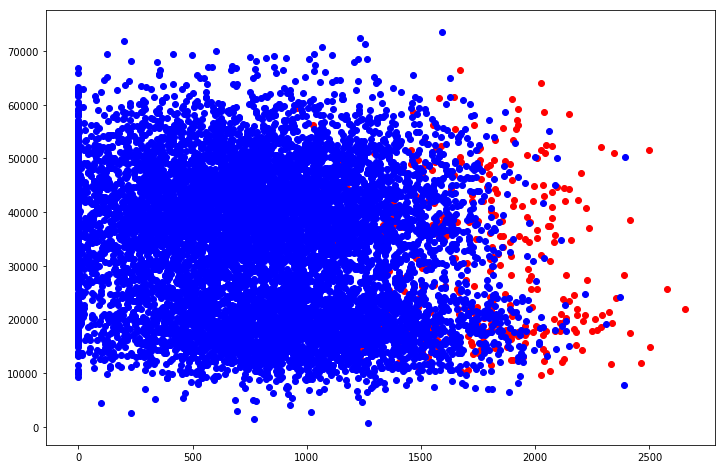

In [22]:
plt.figure(figsize=(12,8))

df_yes = default_df[default_df['default']=='Yes']
df_no = default_df[default_df['default']=='No']

plt.scatter(df_yes['balance'], df_yes['income'], c='r')
plt.scatter(df_no['balance'], df_no['income'], facecolor=None, c='b')

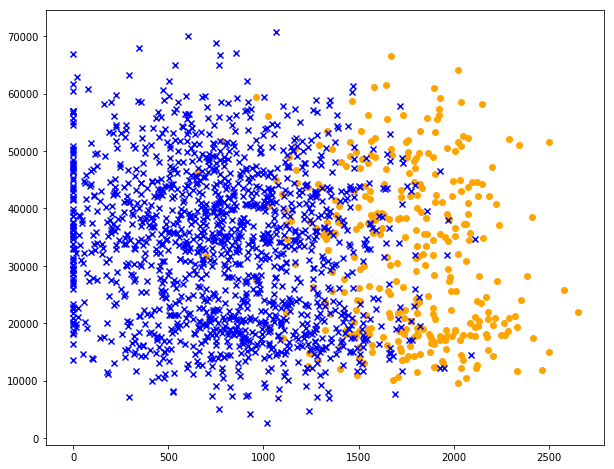

In [14]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df2[df2.default=='Yes'].balance, df2[df2.default=='Yes'].income, c='orange', marker='o')
plt.scatter(df2[df2.default=='No'].balance, df2[df2.default=='No'].income, c='blue', marker='x')

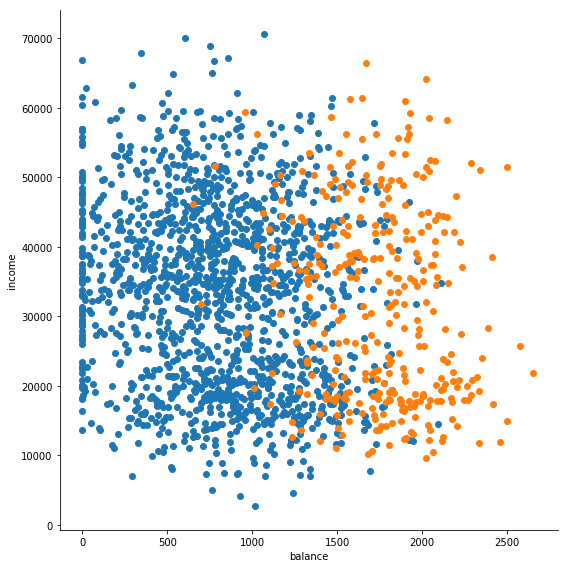

In [13]:
sns.FacetGrid(df2, hue='default', size=8).map(plt.scatter, 'balance', 'income')

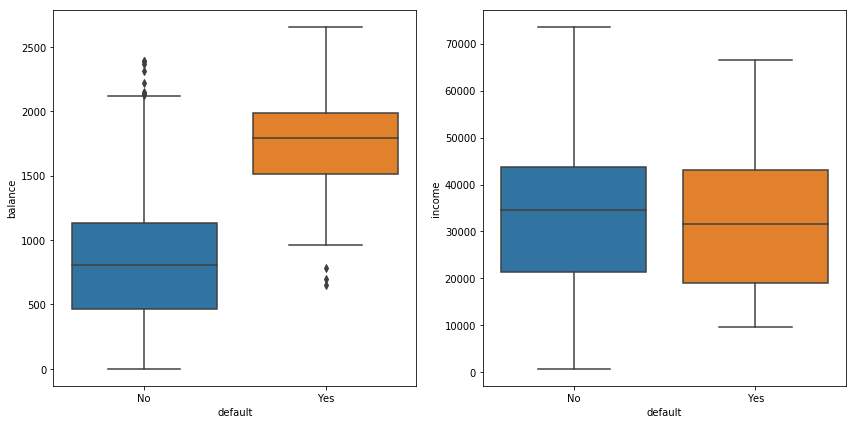

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='default', y='balance', data=default_df, ax=ax1)
sns.boxplot(x='default', y='income', data=default_df, ax=ax2)
plt.tight_layout()

## Figure 4.2

In [85]:
log_reg.predict_proba(x_cord)[:,1].mean()

0.34392919731040494

array([-9.46506555, -9.17226081, -8.87945607, -8.58665132, -8.29384658,
       -8.00104184, -7.70823709, -7.41543235, -7.12262761, -6.82982287,
       -6.53701812, -6.24421338, -5.95140864, -5.65860389, -5.36579915,
       -5.07299441, -4.78018966, -4.48738492, -4.19458018, -3.90177543,
       -3.60897069, -3.31616595, -3.0233612 , -2.73055646, -2.43775172,
       -2.14494697, -1.85214223, -1.55933749, -1.26653275, -0.973728  ,
       -0.68092326, -0.38811852, -0.09531377,  0.19749097,  0.49029571,
        0.78310046,  1.0759052 ,  1.36870994,  1.66151469,  1.95431943,
        2.24712417,  2.53992892,  2.83273366,  3.1255384 ,  3.41834315,
        3.71114789,  4.00395263,  4.29675737,  4.58956212,  4.88236686])

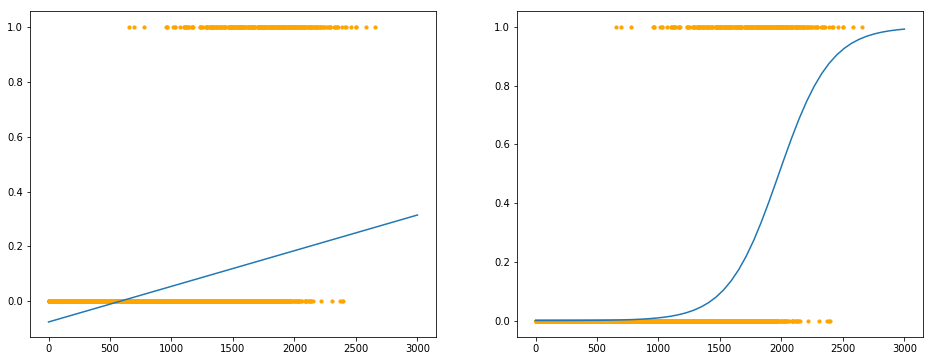

In [102]:
# Preparing the data
X = default_df['balance'].values.reshape(-1,1)
y = default_df['default'].factorize()[0]


# Fitting a linear model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting a logistic model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Plotting the graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x_cord = np.linspace(0, 3000, 50).reshape(-1,1)

ax1.scatter(X, y, s=10, c='orange')
ax2.scatter(X, y, s=10, c='orange')
ax1.plot(x_cord, lin_reg.predict(x_cord))
ax2.plot(x_cord, log_reg.predict_proba(x_cord)[:,1])

(-0.1, 1.1)

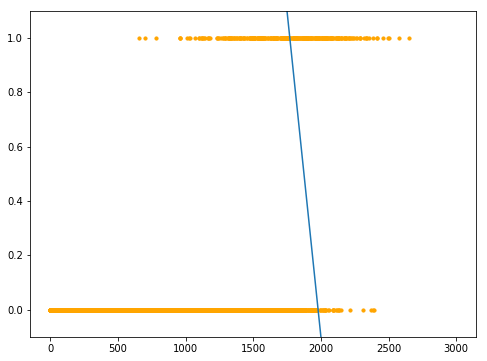

In [86]:
plt.figure(figsize=(8, 6))
log_odds = np.log(log_reg.predict_proba(x_cord)[:,0]/log_reg.predict_proba(x_cord)[:,1])

plt.scatter(X, y, s=10, c='orange')
plt.plot(x_cord, log_odds)
plt.ylim(-0.1, 1.1)

In [223]:
default_df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [224]:
default_df['student'] = default_df['student'].factorize()[0]
default_df['default'] = default_df['default'].factorize()[0]

## Table 4.1

In [93]:
## To add a constant columns for intercept
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = sm.add_constant(default_df.balance)
y = df.default.factorize()[0]

log_reg = smf.Logit(y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.4534
Time:                        09:37:42   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [95]:
default_df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [99]:
p = 333/1000
np.log(p/(1-p))

-0.69464755593517991

## Table 4.2

In [229]:
X = sm.add_constant(default_df.student)
y = default_df.default

log_reg = smf.Logit(y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                0.004097
Time:                        20:11:29   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                 0.0005416
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student        0.4049      0.115      3.520      0.000       0.179       0.630
==============================================================================
"""

## 4.3.4 Multiple Logistic Regression

<img src="img/MultipleLogisticRegression.png" width=75% align='left'>

## Table 4.3

In [228]:
X = default_df[['balance', 'income', 'student']]
y = default_df['default']
X = sm.add_constant(X)

log_reg2 = smf.Logit(y, X).fit()
log_reg2.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                  0.4619
Time:                        19:56:23   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Figure 4.3 - Confounding in the Default data

In [314]:
default_df.head()

,default,student,balance,income,threshold
1,0,0,729.526495,44361.625074,"(697.157, 823.637]"
2,0,1,817.180407,12106.134700,"(697.157, 823.637]"
3,0,0,1073.549164,31767.138947,"(951.25, 1086.185]"
4,0,0,529.250605,35704.493935,"(395.378, 561.623]"
5,0,0,785.655883,38463.495879,"(697.157, 823.637]"


In [315]:
pd.pivot_table(data=default_df, index='default', columns='student', aggfunc='count')['balance']

student,0,1
default,,
0,6850,2817
1,206,127


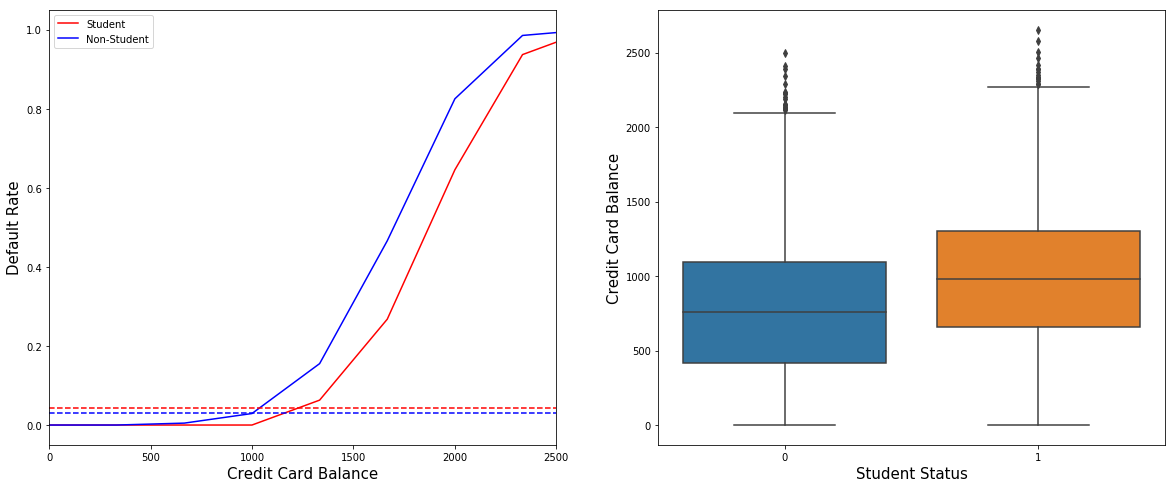

In [316]:
default_rates = {'balance': [], 'student_default_rate': [], 'non_student_default_rate': []}
for bal in np.linspace(0, 3000, 10):
    
    default_rates['balance'].append(bal)
        
    df = default_df[(default_df.student==1) & (default_df.balance <=bal)]
    default_rates['student_default_rate'].append(df.default.sum()/127)
    
    df = default_df[(default_df.student==0) & (default_df.balance <=bal)]
    default_rates['non_student_default_rate'].append(df.default.sum()/206)
    
default_rates = pd.DataFrame(default_rates)


## Plotting the graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.plot(default_rates.balance, default_rates.student_default_rate, c='r', label='Student')
ax1.plot(default_rates.balance, default_rates.non_student_default_rate, c='b', label='Non-Student')
ax1.plot([0, 3000], [127/(127+2817), 127/(127+2817)], c='r', linestyle='--')
ax1.plot([0, 3000], [206/(206+6850), 206/(206+6850)], c='b', linestyle='--')
ax1.set_xlim(0, 2500)
ax1.set_xlabel('Credit Card Balance', fontsize=15)
ax1.set_ylabel('Default Rate', fontsize=15)
ax1.legend()

sns.boxplot(x='student', y='balance', data=default_df, ax=ax2)
ax2.set_xlabel('Student Status', fontsize=15)
ax2.set_ylabel('Credit Card Balance', fontsize=15)

# 4.4 Linear Discriminant Analysisi

### 4.4.1 Using Bayes' Theorem for Classification

Let No. of Classes $K >= 2$

$f_k(x) = Pr(X=x|Y=k)$ is the density function of X for an observation that comes from $k^{th}$ class.

$\pi_k = Pr(Y=k)$ represent overall or prior probability that a randomly chosen observation comes from $k^{th}$ class.

Then Using Bayes's Therem:
## Posterior Prabability $p_k(x) = Pr(Y=k|X=x) = \frac{Pr(X=x|Y=k)\times Pr(Y=k)}{Pr(X=x)} = \frac{\pi_k f_k(x)}{\sum_{l=1}^K \pi_l f_l(x)} $

Suppose we assume that $f_k(x)$ is a Normal or Gausian distribution then the normal density function takes the form:

## $f_k(x) = \frac{1}{\sqrt{2\pi\sigma_k^2}} exp(-\frac{1}{2\sigma_k^2}(x-\mu_k)^2$ 
where $\mu_k$ and $\sigma_k^2$ are the mean and variance parameter for kth class

The discriminant function is given by 
## $\delta_k(x) = x. \frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+log(\pi_k)$

To reiterate, the LDA classifier results from assuming that the observations within each class come from a normal distribution with a class-specific mean vector and a common variance $σ^2$, and plugging estimates for these parameters into the Bayes classifier.

In [336]:
n = 1000 # sample size
mu, sigma = -1.25, 1 # mean and standard deviation
f1 = np.random.normal(mu, sigma, n)

mu, sigma = 1.25, 1 # mean and standard deviation
f2 = np.random.normal(mu, sigma, n)

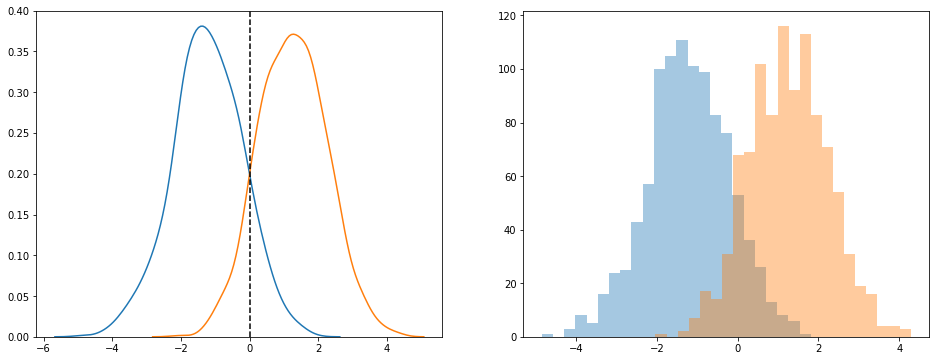

In [341]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(f1, hist=False, ax=ax1)
sns.distplot(f2, hist=False, ax=ax1)
ax1.plot([0, 0], [0, 0.40], c='k', linestyle='--')


sns.distplot(f1, kde=False, ax=ax2)
sns.distplot(f2, kde=False, ax=ax2)

### Fitting LDA to default data

In [342]:
default_df.head()

,default,student,balance,income,threshold
1,0,0,729.526495,44361.625074,"(697.157, 823.637]"
2,0,1,817.180407,12106.134700,"(697.157, 823.637]"
3,0,0,1073.549164,31767.138947,"(951.25, 1086.185]"
4,0,0,529.250605,35704.493935,"(395.378, 561.623]"
5,0,0,785.655883,38463.495879,"(697.157, 823.637]"


In [345]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = default_df[['student', 'balance', 'income']].as_matrix()
y = default_df['default'].as_matrix()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

In [409]:
reload(mv)
mv.print_score(lda, X, X, y, y, train=True, cv=False, threshold=0.3)

Classifier: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Train Result:

Confusion Matrix:
Predicted     0    1
Actual              
0          9571   96
1           181  152

Accuracy Score: 0.9723

Classification Report:
             precision    recall  f1-score   support

          0     0.9814    0.9901    0.9857      9667
          1     0.6129    0.4565    0.5232       333

avg / total     0.9692    0.9723    0.9703     10000

----------------------------------------------------------------------------------------------------


In [400]:
threshold = 0.2
y_proba = lda.predict_proba(X)[:, 1]
y_pred = [1 if p >= threshold else 0 for p in y_proba]
pd.Series(y_pred).value_counts()

0    9575
1     425
dtype: int64

In [379]:
pd.Series(lda.predict(X)).value_counts()

0    9899
1     101
dtype: int64

In [402]:
import pandas as pd
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,1,All
Actual,,,
0,9435,232,9667
1,140,193,333
All,9575,425,10000


# ---------------------- Lab ------------------------------

In [ ]:
### plotting the logistic regression
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
sns.regplot(df.balance, df.default2, scatter_kws={'color':'orange'}, line_kws={'color':'blue', 'lw':2}, ax=ax1)

# Right plot
ax2.scatter(X_train, y_train, c='orange')
ax2.plot(X_test, y_pred[:,1], c='blue')

In [9]:
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]

In [8]:
## To balace the class weight
df_no = df[df.default=='No'].sample(frac=0.15)
df_yes = df[df.default=='Yes']
df2 = df_no.append(df_yes)

In [9]:
df2.default.value_counts()

No     1450
Yes     333
Name: default, dtype: int64

In [10]:
df2.income.min()

2702.9823314968708

In [41]:
X_train = df.balance.values.reshape(-1,1)
y_train = df.default2

X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
## predicting the probability
y_pred = clf.predict_proba(X_test)

In [62]:
print(clf)
print()
print('classes: \t{}'.format(clf.classes_))
print('coefficients: \t{}'.format(clf.coef_))
print('intercept :\t{}'.format(clf.intercept_))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

classes: 	[0 1]
coefficients: 	[[ 0.00549892]]
intercept :	[-10.65132784]


In [75]:
## Logistic regression on student
X_train = sm.add_constant(df.student2)
y_train = df.default2

est = smf.Logit(y_train, X_train).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 May 2018   Pseudo R-squ.:                0.004097
Time:                        09:42:31   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                 0.0005416
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.115      3.520      0.000       0.179       0.630
==============================================================================
"""

### Multiple Logistic Regression

In [79]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
y_train = df.default2

est = smf.Logit(y_train, X_train).fit()
est.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default2         AIC:              1579.5448  
Date:               2018-05-28 09:46 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
const       -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
student2     -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
==================================================================

"""

In [81]:
#notice the difference between summary() and summary2()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 May 2018   Pseudo R-squ.:                  0.4619
Time:                        09:56:54   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2      -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [86]:
df.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


In [84]:
df.head()

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0
4,No,No,529.250605,35704.493935,0,0
5,No,No,785.655883,38463.495879,0,0


## Confounding

In [117]:
X_train1 = df[df.student=='Yes'].balance.values.reshape(-1,1)
y_train1 = df[df.student=='Yes'].default2.values

clf1 = LogisticRegression(solver='newton-cg')
clf1.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
X_train2 = df[df.student=='No'].balance.values.reshape(-1,1)
y_train2 = df[df.student=='No'].default2.values

clf2 = LogisticRegression(solver='newton-cg')
clf2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
## predicting probalities
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

y_prob1 = clf1.predict_proba(X_test)
y_prob2 = clf2.predict_proba(X_test)

In [120]:
df.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


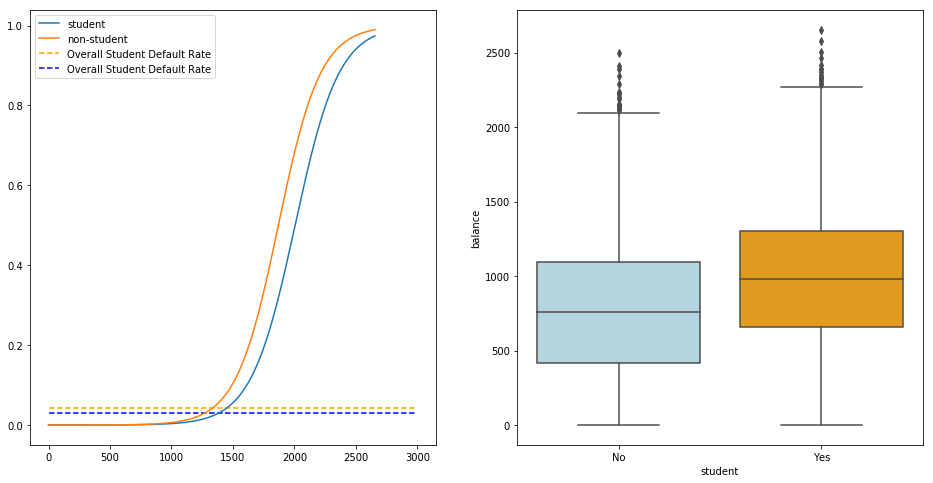

In [139]:
## visualising
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

## left plot
ax1.plot(X_test, y_prob1[:,1], label='student')
ax1.plot(X_test, y_prob2[:,1], label='non-student')

ax1.hlines(127/(2817+127), xmin=0, xmax=3000, colors='orange', linestyle='--', label='Overall Student Default Rate')
ax1.hlines(206/(6850+206), xmin=0, xmax=3000, colors='blue', linestyle='--', label='Overall Student Default Rate')
ax1.legend()

## right plot
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot(x='student', y='balance', data=df, ax=ax2, palette=c_palette)

***

# Linear Discriminant Analysis

In [142]:
X = df[['balance', 'income', 'student2']].as_matrix()
y = df.default2.as_matrix()

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X,y).predict(X)

In [159]:
mv.print_score(lda, X, X, y, y, train=True, cv=False)

Classifier: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Train Result:

Confusion Matrix:
Pred >>     0   1
True             
0        9645  22
1         254  79

Accuracy Score: 0.9724

Classification Report:
             precision    recall  f1-score   support

          0     0.9743    0.9977    0.9859      9667
          1     0.7822    0.2372    0.3641       333

avg / total     0.9679    0.9724    0.9652     10000

----------------------------------------------------------------------------------------------------


In [163]:
decision_prob = 0.2
y_prob = lda.predict_proba(X)[:,1]
y_pred = np.where(y_prob>0.2, 1,0)

In [179]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, y_pred))
print(classification_report(y,y_pred, digits=4))

[[9435  232]
 [ 140  193]]
             precision    recall  f1-score   support

          0     0.9854    0.9760    0.9807      9667
          1     0.4541    0.5796    0.5092       333

avg / total     0.9677    0.9628    0.9650     10000



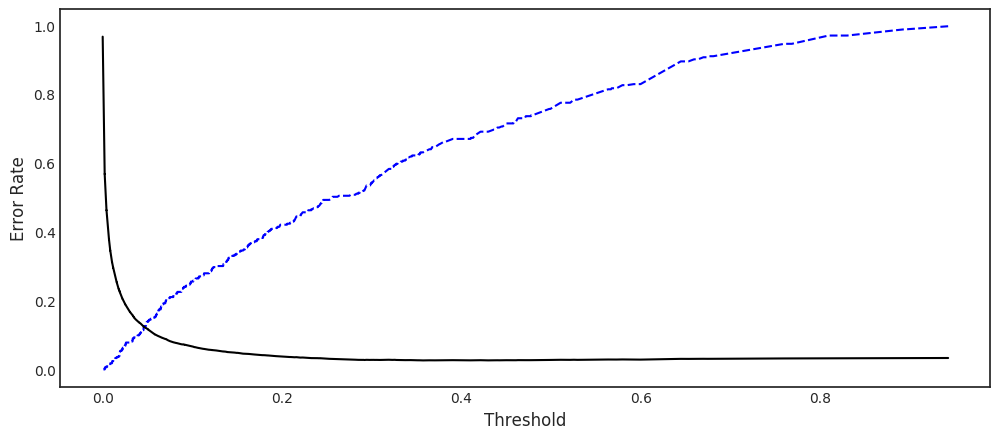

In [202]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_prob)
fnr = 1-tpr
fp = fpr*9667
fn = fnr*333
err_rt = (fp+fn)/10000

test = mv.series_combiner([fpr,tpr,fnr,fp,fn,err_rt],['fpr','tpr','fnr','fp','fn','err_rt'])

plt.figure(figsize=(12,5))
plt.plot(thresholds, 1-tpr, c='blue', linestyle='--')
plt.plot(thresholds, err_rt, c='black')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')

0.94952022468315

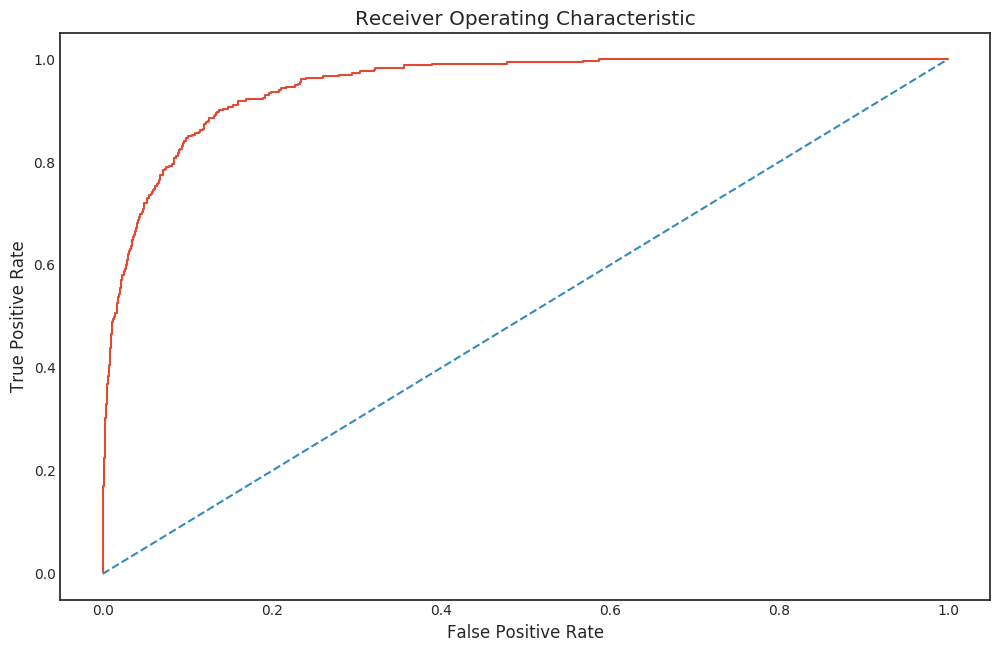

In [211]:
#plot ROC curve
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_prob)

In [213]:
lda.coef_

array([[  4.70457011e-03,   7.06104511e-06,  -3.66258053e-01]])

In [214]:
lda.intercept_

array([-9.4794016])

In [ ]:
lda.